In [1]:
#1
from gensim.downloader import load
print("Loading pre-trained GloVe model (50 dimensions)...")
model = load("glove-wiki-gigaword-50")
def ewr():
    result = model.most_similar(positive=["king", "woman"], negative=["man"], topn=1)
    print("\n'king' - 'man' + 'woman'?", result[0][0])
    print("Similarity:", result[0][1])

    result = model.most_similar(positive=["paris", "italy"], negative=["france"], topn=1)
    print("\n'paris' - 'france' + 'italy'?", result[0][0])
    print("Similarity:", result[0][1])

    result = model.most_similar(positive=["programming"], topn=5)
    print("\nTop 5 words similar to 'programming':")
    for word, similarity in result:
        print(word, similarity)
ewr()


Loading pre-trained GloVe model (50 dimensions)...

'king' - 'man' + 'woman'? queen
Similarity: 0.8523604273796082

'paris' - 'france' + 'italy'? rome
Similarity: 0.8465589284896851

Top 5 words similar to 'programming':
network 0.7707955241203308
interactive 0.7613598704338074
format 0.7584695219993591
channels 0.753067672252655
networks 0.752894937992096


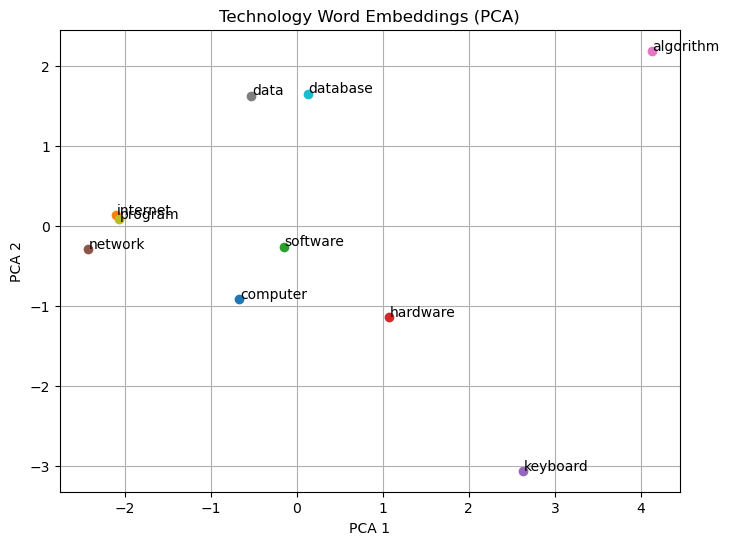


Top 5 words similar to 'network':
networks: 0.9320
cable: 0.8626
channel: 0.8505
channels: 0.8178
internet: 0.8144


In [2]:
#2
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

wv = api.load("glove-wiki-gigaword-50")
tech_words = ['computer', 'internet', 'software', 'hardware', 'keyboard', 'network', 'algorithm', 'data', 'program', 'database']
vectors = [wv[word] for word in tech_words]

pca = PCA(n_components=2)
points = pca.fit_transform(vectors)

plt.figure(figsize=(8, 6))
for i, word in enumerate(tech_words):
    x, y = points[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word)
plt.title("Technology Word Embeddings (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

def similar_words(word):
    try:
        print(f"\nTop 5 words similar to '{word}':")
        for w, sim in wv.most_similar(word, topn=5):
            print(f"{w}: {sim:.4f}")
    except KeyError:
        print(f"'{word}' not found in vocabulary.")

similar_words("network")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


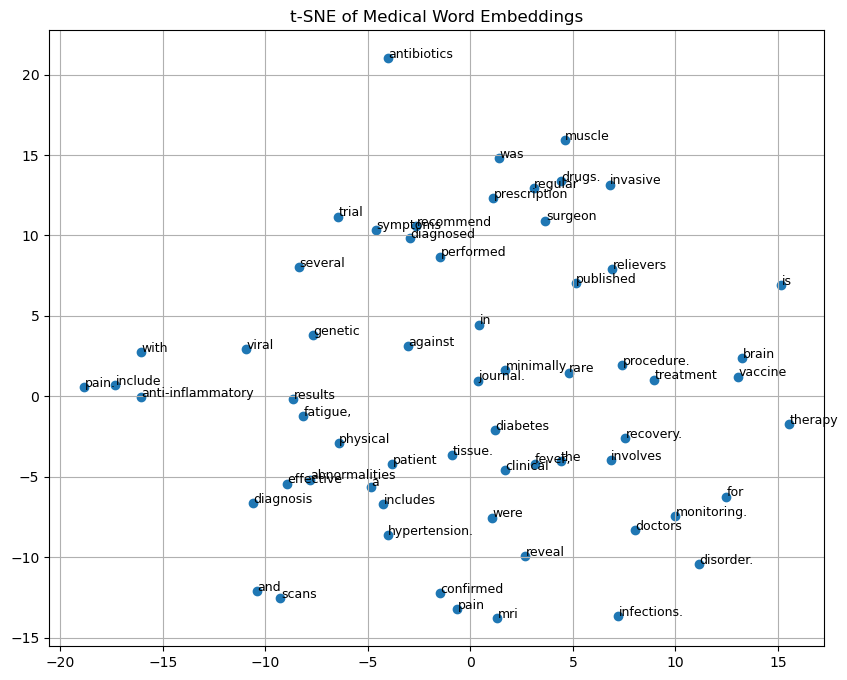


Words similar to 'treatment':
procedure.: 0.27
confirmed: 0.15
muscle: 0.13
monitoring.: 0.12
mri: 0.11

Words similar to 'vaccine':
brain: 0.25
recommend: 0.20
procedure.: 0.20
therapy: 0.19
in: 0.19


In [3]:
#3
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Sample medical corpus
corpus = [
    "The patient was diagnosed with diabetes and hypertension.",
    "MRI scans reveal abnormalities in the brain tissue.",
    "The treatment involves antibiotics and regular monitoring.",
    "Symptoms include fever, fatigue, and muscle pain.",
    "The vaccine is effective against several viral infections.",
    "Doctors recommend physical therapy for recovery.",
    "Clinical trial results were published in the journal.",
    "The surgeon performed a minimally invasive procedure.",
    "Prescription includes pain relievers and anti-inflammatory drugs.",
    "Diagnosis confirmed a rare genetic disorder."
]
sentences = [sentence.lower().split() for sentence in corpus]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, epochs=50)

words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])
tsne = TSNE(n_components=2, perplexity=5, random_state=42, n_iter=300)
reduced_vectors = tsne.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])
for i, word in enumerate(words):
    plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=9)
plt.title("t-SNE of Medical Word Embeddings")
plt.grid(True)
plt.show()

def find_similar(word):
    try:
        similar_words = model.wv.most_similar(word, topn=5)
        print(f"\nWords similar to '{word}':")
        for similar, score in similar_words:
            print(f"{similar}: {score:.2f}")
    except KeyError:
        print(f"'{word}' not found in vocabulary.")

find_similar("treatment")
find_similar("vaccine")

In [6]:
# 4
import gensim.downloader as api
from transformers import pipeline

print("Loading GloVe model...")
model = api.load("glove-wiki-gigaword-100")
print("GloVe model loaded.")

print("Loading GPT-2 model for text generation...")
generator = pipeline("text-generation", model="gpt2")
print("GPT-2 model loaded.")

original_prompt = "Describe a nature."

target_word = "futuristic"
try:
    similar_words = [w for w, _ in model.most_similar(target_word, topn=3)]
    enriched_prompt = f"Describe a {', '.join(similar_words)} city."
except KeyError:
    enriched_prompt = original_prompt

original_output = generator(original_prompt, max_length=50)[0]['generated_text']
enriched_output = generator(enriched_prompt, max_length=50)[0]['generated_text']

print("\nOriginal Prompt:", original_prompt)
print("Generated Text:", original_output)
print("\nEnriched Prompt:", enriched_prompt)
print("Generated Text:", enriched_output)

Loading GloVe model...
GloVe model loaded.
Loading GPT-2 model for text generation...


Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


GPT-2 model loaded.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



Original Prompt: Describe a nature.
Generated Text: Describe a nature.

"The word 'nature' has a more than its share of meanings," said Mihael. "In this sense, the word 'nature' is also synonymous with the word 'wild' or 'wilderness.' Wildness is the ultimate source of life. It means the life of the animal, and to that end, it is the name of the animal's species."

Mihael said it is "a very common meaning" to call a particular place a forest or a place of public art, and also to say it as one's own. "What I'm doing is taking a look at a place that is not a place of public art," she said. "It's a place that is not protected by law, and that's where you are going to experience the most wildness."

Mihael said the term 'nature' has been used to describe many different places — from large-scale nature museums, to the parks at Yellowstone National Park and Glacier National Park, to the wild places on Mars, to the wild places on Mars.

"I think this is the idea that all animals have the sam

In [9]:
#5
import gensim.downloader as api
import nltk, random
nltk.download('punkt')

wv = api.load("glove-wiki-gigaword-100")

def similar_words(word, topn=5):
    try:
        return [w for w, _ in wv.most_similar(word, topn=topn)]
    except KeyError:
        return []

def make_sentence(word, sim):
    templates = [
        f"The {word} is associated with {sim[0]} and {sim[1]}.",
        f"People often link '{word}' to {sim[2]}.",
        f"{word} and {sim[3]} often go together.",
        f"In {word} studies, {sim[4]} is vital."
    ]
    return random.choice(templates)

def make_paragraph(word):
    sim = similar_words(word)
    if not sim: return "Try another seed word."
    return ' '.join(make_sentence(word, sim) for _ in range(4))

print("\nGenerated Paragraph:\n")
print(make_paragraph("river"))

[nltk_data] Downloading package punkt to C:\Users\Kusuma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Generated Paragraph:

In river studies, danube is vital. In river studies, danube is vital. The river is associated with rivers and creek. river and valley often go together.


In [10]:
#6
from transformers import pipeline

analyzer = pipeline("sentiment-analysis")

def analyze(text):
    result = analyzer(text)[0]
    print(f"\nText: {text}")
    print(f"Sentiment: {result['label']} (Confidence: {result['score']:.4f})")

reviews = [
    "This app is amazing! I love it so much.",
    "I'm very disappointed, the service was terrible.",
    "Absolutely fantastic, nothing special.",
    "Not useful or helpful. Highly not recommended.",
    "It great, but not the worst either."
]

print("Customer Feedback Analysis:")
for r in reviews:
    analyze(r)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Customer Feedback Analysis:

Text: This app is amazing! I love it so much.
Sentiment: POSITIVE (Confidence: 0.9999)

Text: I'm very disappointed, the service was terrible.
Sentiment: NEGATIVE (Confidence: 0.9998)

Text: Absolutely fantastic, nothing special.
Sentiment: POSITIVE (Confidence: 0.9023)

Text: Not useful or helpful. Highly not recommended.
Sentiment: NEGATIVE (Confidence: 0.9998)

Text: It great, but not the worst either.
Sentiment: POSITIVE (Confidence: 0.9868)


In [11]:
#7
from transformers import pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

while True:
    text = input("\nPaste passage (or type 'exit' to quit):\n").strip()
    if text.lower() == 'exit':
        print("Exiting summarization.")
        break
    if len(text.split()) < 50:
        print("Please enter at least 50 words.")
        continue
    summary = summarizer(text, max_length=130, min_length=30, do_sample=False)[0]['summary_text']
    print("\n Summary:\n" + summary)

Device set to use cpu



Paste passage (or type 'exit' to quit):
 Martin Luther King Jr. was a prominent leader in the American civil rights movement. He is best known for his dedication to nonviolent protest and his powerful speeches advocating for racial equality and justice. King's leadership helped bring about significant changes in laws and attitudes toward segregation and discrimination. His famous "I Have a Dream" speech remains a symbol of hope and the ongoing struggle for civil rights. King’s legacy continues to inspire people around the world to work for equality and peace.


Your max_length is set to 130, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)



 Summary:
Martin Luther King Jr. was a prominent leader in the American civil rights movement. He is best known for his dedication to nonviolent protest and his powerful speeches. His famous "I Have a Dream" speech remains a symbol of hope.



Paste passage (or type 'exit' to quit):
 exit


Exiting summarization.


In [16]:
#8
!pip install langchain cohere langchain-community

import cohere
import getpass
from langchain.prompts import PromptTemplate
from langchain_community.llms import Cohere   

file_path = "teaching.txt"

try:
    with open(file_path, "r", encoding="utf-8") as file:
        text_content = file.read()
    print("File loaded successfully!")
except Exception as e:
    print("Error loading file:", str(e))
    text_content = ""

COHERE_API_KEY = getpass.getpass("Enter your Cohere API Key: ")

cohere_llm = Cohere(cohere_api_key=COHERE_API_KEY, model="command")

template = """
You are an AI assistant helping to summarize and analyze a text document.

Here is the document content:
{text}

Summary:
- Provide a concise summary of the document.

Key Takeaways:
- List 3 important points from the text.

Sentiment Analysis:
- Determine if the sentiment of the document is Positive, Negative, or Neutral.
"""

prompt_template = PromptTemplate(
    input_variables=["text"],
    template=template
)

formatted_prompt = prompt_template.format(text=text_content)
response = cohere_llm.predict(formatted_prompt)

print("\n*Formatted Output*\n")
print(response)

Error loading file: [Errno 2] No such file or directory: 'teaching.txt'


Enter your Cohere API Key:  ········


C:\Users\Kusuma\AppData\Local\Temp\ipykernel_25256\3419863249.py:21: LangChainDeprecationWarning: The class `Cohere` was deprecated in LangChain 0.1.14 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-cohere package and should be used instead. To use it run `pip install -U :class:`~langchain-cohere` and import as `from :class:`~langchain_cohere import Cohere``.
  cohere_llm = Cohere(cohere_api_key=COHERE_API_KEY, model="command")
C:\Users\Kusuma\AppData\Local\Temp\ipykernel_25256\3419863249.py:45: LangChainDeprecationWarning: The method `BaseLLM.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = cohere_llm.predict(formatted_prompt)



*Formatted Output*

 According to the provided document, here is an extracted summary along with key takeaways and the sentiment analysis: 

Summary: The article discusses the potential benefits of AI in the workplace, particularly focusing on logistics and transportation, customer service, and cybersecurity. It highlights several real-world examples of AI implementation, emphasizing the increased efficiency, predictive capabilities, and streamlined workflows resulting from AI integration. 

Key Takeaways:

1. AI Implementation in Logistics and Transportation: The use of AI in logistics and transportation can increase efficiency and optimize routing, leading to cost savings and quicker delivery times. 

2. AI in Enhancing Customer Service: By utilizing AI tools, businesses can provide 24/7 customer assistance, promptly and accurately answering customer queries and improving satisfaction rates. 

3. AI's Role in Cybersecurity: AI technologies offer robust monitoring systems and advance

In [13]:
#9
!pip install wikipedia-api

import wikipediaapi
from pydantic import BaseModel

class InstitutionDetails(BaseModel):
    name: str
    founder: str = "Not Available"
    founded_year: str = "Not Available"
    branches: str = "Not Available"
    employees: str = "Not Available"
    summary: str

def fetch_institution_details(name: str) -> InstitutionDetails:
    wiki = wikipediaapi.Wikipedia(user_agent="MyWikiBot/1.0", language="en")
    page = wiki.page(name)
    if not page.exists():
        raise ValueError("Institution page does not exist on Wikipedia")
    summary = ". ".join(page.summary.split(".")[:4]) + "."
    details = {"name": name, "summary": summary}
    for section in page.sections:
        key = section.title.lower()
        if "founder" in key:
            details["founder"] = section.text.split(".")[0]
        elif "founded" in key:
            details["founded_year"] = section.text.split(".")[0]
        elif "branches" in key:
            details["branches"] = section.text.split(".")[0]
        elif "employees" in key:
            details["employees"] = section.text.split(".")[0]
    return InstitutionDetails(**details)

name = input("Enter Institution Name: ")
try:
    inst = fetch_institution_details(name)
    print(inst.model_dump_json(indent=4))
except ValueError as e:
    print(e)

Enter Institution Name:  Sambhram Institute of Technology


{
    "name": "Sambhram Institute of Technology",
    "founder": "Not Available",
    "founded_year": "Not Available",
    "branches": "Not Available",
    "employees": "Not Available",
    "summary": "Sambhram Institute of Technology was started in 2001 in Bangalore, Karnataka, India.  It is a private self funding  institution, affiliated to Visvesvaraya Technological University It is approved by AICTE, Government of Karnataka & VTU. AICTE.  The campus is situated in M."
}


In [15]:
#10
!pip install PyPDF2 nltk scikit-learn

import PyPDF2, re, string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('punkt')
nltk.download('stopwords')

def extract_text(pdf_path):
    try:
        with open(pdf_path, 'rb') as f:
            reader = PyPDF2.PdfReader(f)
            return "".join(page.extract_text() or "" for page in reader.pages)
    except:
        return ""

def create_index(text):
    pattern = r"((?:CHAPTER|SECTION)\s+\w+\.?\s+.*?)(?=(?:CHAPTER|SECTION)\s+\w+\.?\s+|$)"
    index = {}
    for match in re.findall(pattern, text, re.DOTALL | re.IGNORECASE):
        title = re.match(r"(?:CHAPTER|SECTION)\s+\w+\.?\s+(.*?)(?=\n)", match, re.I)
        if title:
            index[title.group(1).strip()] = match[title.end():].strip()
    return index

def find_section(query, index):
    sections = list(index.values())
    titles = list(index.keys())
    vec = TfidfVectorizer(stop_words='english')
    tfidf = vec.fit_transform(sections + [query])
    sim = cosine_similarity(tfidf[-1], tfidf[:-1]).flatten()
    if sim.max() == 0:
        return None
    return titles[sim.argmax()]

def chatbot(index):
    print("IPC Chatbot started. Type 'exit' to quit.")
    while True:
        q = input("You: ")
        if q.lower() == 'exit': break
        sec = find_section(q, index)
        if sec:
            print(f"Chatbot: Section **{sec}**\n{index[sec][:1000]}...\n")
        else:
            print("Chatbot: No relevant info found.\n")

if __name__ == "__main__":
    text = extract_text("ipc.pdf")
    if text:
        idx = create_index(text)
        chatbot(idx)
    else:
        print("Failed to load IPC PDF.")

[nltk_data] Downloading package punkt to C:\Users\Kusuma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kusuma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


IPC Chatbot started. Type 'exit' to quit.


You:  359


Chatbot: Section **Of Kidnapping, Abduc tion, Slavery and Forced Labour**
359. Kidnapping .—Kidnapping is of two kinds: kidnapping from 1[India], and kidna pping from 
lawful guardianship.  
360. Kidnapping from India .—Whoever conveys an y person beyond the limits of 1[India] without 
the consent of that person, or of some person legally authori sed to consent on behalf of that person, is sa id 
to kidnap that person from 1[India].  
361. Kidnap ping from lawful guardianship .—Whoever tak es or entices any minor under 2[sixteen] 
years of age if a male, or under 3[eighteen] years of age if a female, or any person of unsound mind, out of 
the keeping of the lawful guardian of such minor or person of unsound mind, without the consent of such 
guardian, is said to kidnap such minor or person from lawful guardianship.  
Explanation .—The words “lawful guardian ” in this...



You:  exit
